In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x = np.array([1200,1400,1300,2200,3300,4000,5000,2500,6500])
a = 1*1.5
b = 6*1.5
c= 1*1.5
d = 2*1.5
y = np.array([1.2,1.6,1.5,2.0,a,b,c,d,5.0])
y

array([1.2, 1.6, 1.5, 2. , 1.5, 9. , 1.5, 3. , 5. ])

In [33]:
X = df.Height.values
y_true = df.Weight.values

print(X[:2],
     y_true[:2], sep="\n\n")

[73.84701702 68.78190405]

[241.89356318 162.31047252]


# wX+b
- X provide by user (input)
- W, b try to find these weights through machine learning algoritham


In [23]:
#Line Equation
def line(x, w=0, b=0):
    return x * w + b

# Cost Function
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

#1) real-predic
#2) power
#3) Average
#4) sqrt


[1.7 1.9 1.8 2.7 3.8 4.5 5.5 3.  7. ]
[1.2 1.6 1.5 2.  1.5 9.  1.5 3.  5. ]


5.162222222222223

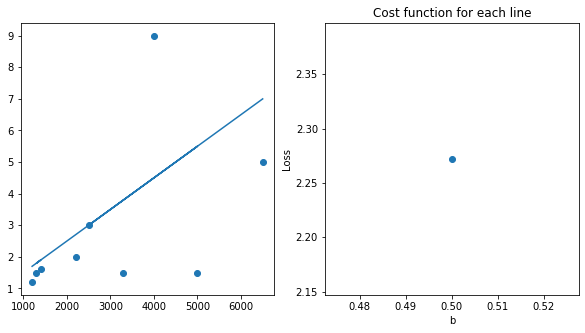

In [31]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)#row, column, select cell
plt.scatter(x,y)
X=x
y_true = y
bs = np.array([0.5])

mses = []# we will store loss value for each line
for b in bs:
    y_pred = line(X, w=0.001, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse) # each line error/loss
    plt.plot(X, y_pred)

ax2 = plt.subplot(122) 
plt.plot(bs,mses, 'o-')
plt.title("Cost function for each line")
plt.xlabel("b")
plt.ylabel("Loss")
print(y_pred)
print(y_true)
np.average(((y_pred-y_true)**2))

In [34]:
x

array([1200, 1400, 1300, 2200, 3300, 4000, 5000, 2500, 6500])

In [35]:
line(np.array([5.5]), w=0.001, b=0.5)

array([0.5055])

In [27]:
mse

2.272052425060263

In [28]:
mses

[2.272052425060263]

In [18]:
print(y_true)
print(y_pred)

[1.2 1.6 1.5 2.  1.5 9.  1.5 3.  5. ]
[ 2400.5  2800.5  2600.5  4400.5  6600.5  8000.5 10000.5  5000.5 13000.5]


# Try to find w and b (weights) with Deep learning

In [11]:
from tensorflow.keras.models import Sequential # Sequential/Functional Api
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.optimizers import Adam, SGD

In [12]:
X = df.Height.values
y_true = df.Weight.values

print(X[:2],
     y_true[:2], sep="\n\n")

[73.84701702 68.78190405]

[241.89356318 162.31047252]


In [13]:
X.shape

(10000,)

In [15]:
#Model Structure
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compilation steps
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [19]:
#Model Training
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 1328.2812
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 573.9647
Epoch 3/40
313/313 [==============================] - 1s 2ms/step - loss: 529.2777
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 492.3606
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 469.2266
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 414.6873
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 371.8924
Epoch 8/40
313/313 [==============================] - 1s 2ms/step - loss: 341.1653
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 324.1262
Epoch 10/40
313/313 [==============================] - 1s 2ms/step - loss: 293.4867
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 266.8832
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 252.3976


In [20]:
y_pred = model.predict(X)
y_pred

array([[226.51132],
       [187.1207 ],
       [228.55734],
       ...,
       [148.90588],
       [189.08304],
       [133.94519]], dtype=float32)

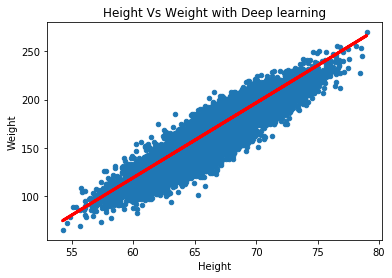

In [21]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)

In [23]:
w, b = model.get_weights()
print(w,b)

[[7.776857]] [-347.78635]


In [24]:
model.predict([[120]])

array([[585.4365]], dtype=float32)

Enter Height in Number80


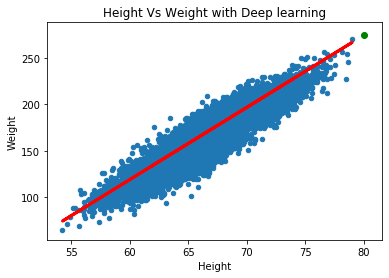

In [29]:
i = int(input("Enter Height in Number"))
j = model.predict([[i]])

df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)
plt.scatter(i,j, color='green')

In [ ]:
#colab.com
#import tensorflow
#tensorflow.__version__
#pip install --upgrade tensorflow
#tensorflow.__version__

In [30]:
model.save("./weight_height_model.h5")